**I) Import Data Sets to Kaggle Coding Envrionment**

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import accuracy_score

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# creates a pandas dataframe from the kaggle input
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

print(train_data.PassengerId.nunique())

891


**II) Data Cleaning**

In [3]:
# Finds the duplicates in the train data set and prints them out 
print(train_data.duplicated().sum())

# Finds the duplicates in the test data set and prints them out 
print(test_data.duplicated().sum())

0
0


In [4]:
# Shows the number of columns in train data with missing values,
# lists those columns, and then how many missing values per column
print(len(train_data.columns[train_data.isnull().any()]))
print(train_data.columns[train_data.isnull().any()])
train_data.isnull().sum()

3
Index(['Age', 'Cabin', 'Embarked'], dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Replaces missing data in the train data Age column with the median age - 
# reduces influence of the right-skewed data
train_data['Age'] = train_data['Age'].replace(np.NAN, train_data['Age'].median())
# Replaces missing data in the Embarked column with the mode Embarked - 'S'
train_data['Embarked'] = train_data['Embarked'].replace(np.NAN, 'S')

print(len(train_data.columns[train_data.isnull().any()]))
print(train_data.columns[train_data.isnull().any()])
train_data.isnull().sum()


1
Index(['Cabin'], dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# Shows the number of columns in test data with missing values,
# lists those columns, and then how many missing values per column
print(len(test_data.columns[test_data.isnull().any()]))
print(test_data.columns[test_data.isnull().any()])
test_data.isnull().sum()

3
Index(['Age', 'Fare', 'Cabin'], dtype='object')


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Replaces missing data in the test data Age column with the median age - 
# reduces influence of the right-skewed data
test_data['Age'] = test_data['Age'].replace(np.NAN, test_data['Age'].median())
# Replaces missing data in the Embarked column with the mode Embarked - 'S'
test_data['Embarked'] = test_data['Embarked'].replace(np.NAN, 'S')
# Replaces missing data in the Fare column with the median Fare
test_data['Fare'] = test_data['Fare'].replace(np.NAN, test_data['Fare'].median())

print(len(test_data.columns[test_data.isnull().any()]))
print(test_data.columns[test_data.isnull().any()])
test_data.isnull().sum()

1
Index(['Cabin'], dtype='object')


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

**III) Exploring Data Sets**

In [8]:
train_data.info()
train_data.describe() 
#From the table below, we know that there are 38.38% passangers survived in train data set. Ages of
# passangers range from 0.42 to 80 years old. Let's explore more variables by visualization.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


% of first class who survived: 0.6296296296296297
% of second class who survived: 0.47282608695652173
% of first class who survived: 0.24236252545824846


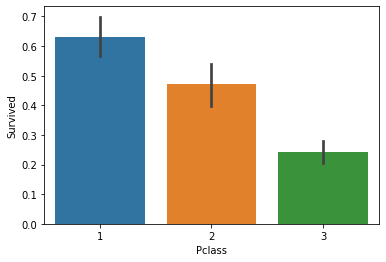

In [9]:
#Passanger class and survivability 
sns.barplot(x='Pclass', y='Survived', data=train_data)

# Checks for heuristic evidence that passenger class affects survivability
firstClass = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_firstClass = sum(firstClass)/len(firstClass)
print("% of first class who survived:", rate_firstClass)

secondClass = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_secondClass = sum(secondClass)/len(secondClass)
print("% of second class who survived:", rate_secondClass)

thirdClass = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_thirdClass = sum(thirdClass)/len(thirdClass)
print("% of first class who survived:", rate_thirdClass)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


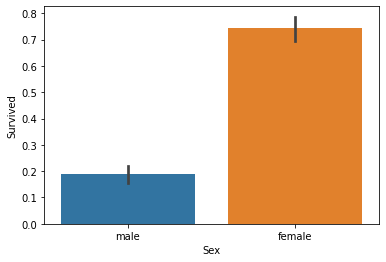

In [10]:
#Sex and survivability

sns.barplot(x='Sex', y='Survived', data=train_data)

# Checks for heuristic evidence that passenger sex affects survivability
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


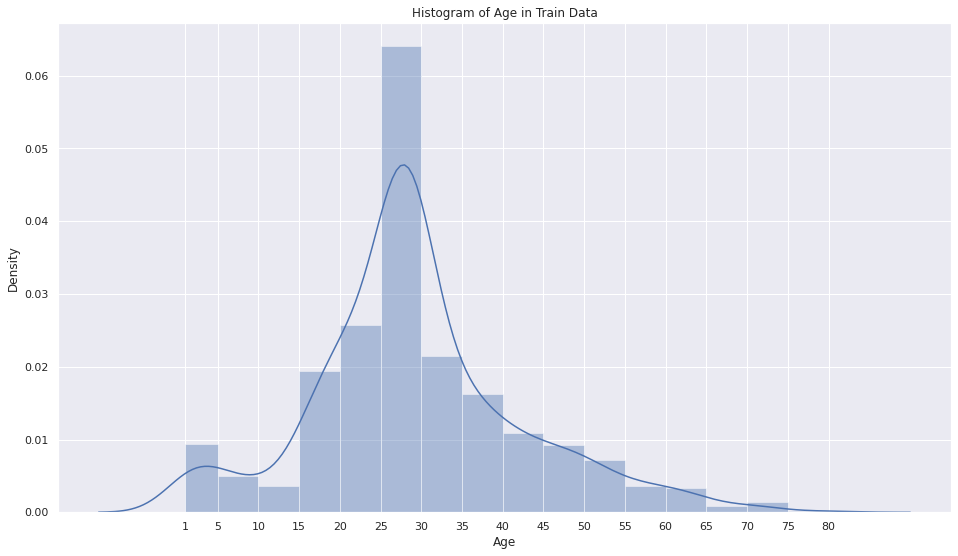

In [11]:
#Age and Survivability
# Modify histogram with bins  
bins = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80] # list
 
plt.figure(figsize=(16,9))
sns.set()
 
sns.distplot(train_data["Age"], bins = bins)
 
plt.xticks(bins) # set bins value
 
plt.title("Histogram of Age in Train Data") 
plt.show()

In [12]:
# Checks for heuristic evidence that passengers under 10 survived
kids = train_data.loc[train_data.Age <= 18]["Survived"]
rate_kids = sum(kids)/len(kids)

print("% of kids under 10 who survived:", rate_kids)

# Checks for heuristic evidence that passengers older than 60 survived
old = train_data.loc[train_data.Age >= 60]["Survived"]
rate_old = sum(old)/len(old)

print("% of elder older than 60 who survived:", rate_old)

% of kids under 10 who survived: 0.5035971223021583
% of elder older than 60 who survived: 0.2692307692307692


In [13]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


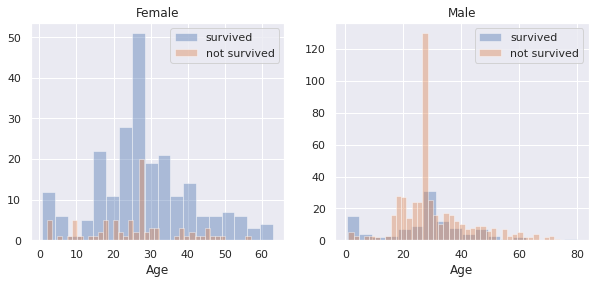

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

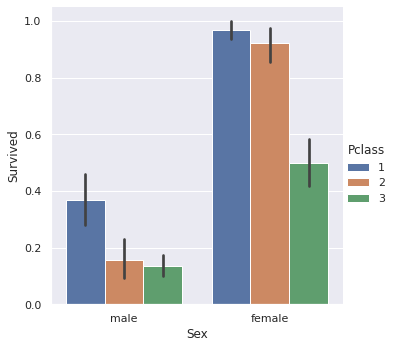

In [15]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_data)

In [16]:
# Embarked and survivability
# convert Embarked to a numerical variable
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Coverting Sex into a numerical variable
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
# display updated DataFrame
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


**IV)Multivariable Logistic Regresssion Model**

In [17]:
# Model 1: Using all numerical data in our data set.
model_GLM_1 = glm(formula = 'Survived ~ Pclass + Fare + Age + Sex + SibSp + Parch + Embarked ', data = train_data, family = sm.families.Binomial()).fit()
print(model_GLM_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.13
Date:                Sun, 21 Nov 2021   Deviance:                       786.26
Time:                        16:29:49   Pearson chi2:                     910.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1891      0.479      4.565      0.0

In [18]:
# Uses the model from Attempt 2 on our test data to predict survivability
model_GLM_1.predict(exog = test_data)
train_data['fitted'] = model_GLM_1.fittedvalues.values

In [19]:
# Creates a cutoff for survivability for training data
cutoff = 0.4
train_data['PredSurv'] = np.where(train_data['fitted'] > cutoff, 1, 0)
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [20]:
model_GLM_1.predict(test_data)
test_data['fitted'] = model_GLM_1.predict(test_data)
# Creates a cutoff for survivability for test data
cutoff = 0.4
test_data['PredSurv'] = np.where(test_data['fitted'] > cutoff, 1, 0)

In [21]:
# Accuracy Score Calculation 
comparison_column = np.where(train_data['PredSurv'] == train_data['Survived'], True, False)
accuracy_score_1 = comparison_column.sum() / train_data.PassengerId.nunique()
print(accuracy_score_1)

0.7890011223344556


In [22]:
predictions = np.where(test_data['fitted'] > cutoff, 1, 0)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print(output)
print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
Your submission was successfully saved!
